# Лабораторная работа №2 (Обучение с учителем)

## Задание

1. Изучить заданный вариантом метод (лог. регрессия / дерево принятия решений / опорных векторов)
2. Загрузить набор статей согласно варианту
3. Отфильтровать статьи с нужными тегами
4. Закодировать статьи согласно варианту (выделение признаков)
5. Варьируя заданные параметры модели, найти оптимальные
Для этого нужно обучать модель на выборке данных, постепенно изменяя параметры, и запоминая лучший результат на каждом шаге. Обучение необходимо производить методом кросс-валидации.
6. Разбить выборку на тренировочную и тестовую и обучить модель с оптимальными параметрами тренировочной выборке. Соотношение размеров тренировочной и полной выборки: 0.7.
7. Вывести первые 15 слов, которые модель сочла наиболее информативными. Попытаться понять, к какой категории относится соответствующее слово. Также вывести точность модели.

### !!!ВАЖНО!!!  
* В методе опорных векторов должно использоваться линейное ядро, для того, чтобы впоследствии была возможность определения самых важных признаков.
* Корпус Lenta можно скачать по ссылке: https://www.kaggle.com/yutkin/corpus-of-russian-news-articles-from-lenta  
    * ТЕГИ корпуса, по которым нужно фильтровать: 'Деньги', 'Театр', 'Оружие', 'Книги', 'Техника'
* Корпус 20newsgroups импортится прямо из библиотеки sklearn: 
```python
from sklearn import datasets
newsgroups = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space', 
                                                                   'sci.electronics', 'rec.sport.baseball', 
                                                                   'talk.politics.guns'])
```
    * ТЕГИ корпуса, по которым нужно фильтровать: 'alt.atheism', 'sci.space', 'sci.electronics', 'rec.sport.baseball', 'talk.politics.guns'
* Из корпуса 20newsgroups можно сразу загрузить документы только с нужными тегами, с помощью параметра categories (см. выше)
* В случае с корпусом Lenta придется написать код

## Варианты

|Вариант|Корпус|Модель|Метод выделения признаков|Варьируемые параметры|
|-|-|-|-|-|
|1|Lenta|Логистическая регрессия|Bag of Words|C|
|2|Lenta|Логистическая регрессия|TF-IDF|C|
|3|Lenta|Д. П. Р.|Bag of Words|Max Depth|
|4|Lenta|Д. П. Р.|TF-IDF|Max Depth|
|5|Lenta|Метод Опорных Векторов|Bag of Words|C|
|6|Lenta|Метод Опорных Векторов|TF-IDF|C|
|7|20newsgroups|Логистическая регрессия|Bag of Words|C|
|8|20newsgroups|Логистическая регрессия|TF-IDF|C|
|9|20newsgroups|Д. П. Р.|Bag of Words|Max Depth|
|10|20newsgroups|Д. П. Р.|TF-IDF|Max Depth|
|11|20newsgroups|Метод Опорных Векторов|Bag of Words|C|
|12|20newsgroups|Метод Опорных Векторов|TF-IDF|C|



## Содержание отчета

1. Титульный лист
2. Текст задания согласно варианту
3. Исходный код
4. Значение оптимальных параметров
5. Точность модели и наиболее информативные слова
6. Вывод по работе

## Вопросы к защите

1. Принцип работы соответствующей модели
2. Влияние варьируемых параметров на поведение модели.
3. Способы выделения признаков

## Инструкция

### Загрузка данных и фильтрация

In [1]:
from sklearn import datasets
data = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space', 
                                                             'sci.electronics', 'rec.sport.baseball', 
                                                             'talk.politics.guns'],
                                  shuffle=True)

### Выделение признаков

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data.data)
y = data.target

In [3]:
print(X, y)

  (0, 42268)	1
  (0, 9088)	1
  (0, 9216)	1
  (0, 46950)	1
  (0, 46466)	1
  (0, 23853)	1
  (0, 8000)	1
  (0, 614)	1
  (0, 35264)	1
  (0, 32573)	1
  (0, 23748)	1
  (0, 7999)	1
  (0, 21461)	2
  (0, 43000)	1
  (0, 5870)	1
  (0, 43129)	1
  (0, 43816)	1
  (0, 29506)	1
  (0, 29793)	1
  (0, 48059)	1
  (0, 23190)	1
  (0, 30127)	1
  (0, 9900)	1
  (0, 47098)	1
  (0, 20590)	2
  :	:
  (4673, 28192)	1
  (4673, 27366)	2
  (4673, 9216)	2
  (4673, 43000)	1
  (4673, 22146)	1
  (4673, 49322)	1
  (4673, 34104)	1
  (4673, 34949)	1
  (4673, 27441)	2
  (4673, 12728)	1
  (4673, 34771)	1
  (4673, 45817)	2
  (4673, 34783)	1
  (4673, 25005)	1
  (4673, 9268)	2
  (4673, 48515)	1
  (4673, 45823)	3
  (4673, 46303)	1
  (4673, 34996)	1
  (4673, 26281)	2
  (4673, 29868)	1
  (4673, 45503)	1
  (4673, 38900)	1
  (4673, 44451)	1
  (4673, 22505)	3 [1 3 1 ... 0 4 3]


### Создание модели

In [4]:
from sklearn.svm import SVC # Vector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

model = SVC(kernel='linear')

### Нахождение оптимальных параметров модели

In [9]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV

variety_grid = {'C': np.power(10.0, np.arange(-5, 6))}
# Build cross-validation generator
generator = KFold(n_splits=5, shuffle=True)
# Now build searcher
searcher = GridSearchCV(estimator=model, param_grid=variety_grid, scoring='accuracy', cv=generator)
# This will take some time
searcher.fit(X, y)

best_parameters = searcher.best_params_

In [6]:
best_parameters = {'C': 1.0}
print(best_parameters)

{'C': 1.0}


### Обучение модели с оптимальными параметрами

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

model = SVC(kernel='linear', C=best_parameters['C'])
model.fit(X_train, y_train)

D:\Conda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Вывод точности модели и топ 10 самых важных слов

Accuracy: 0.947255880256593


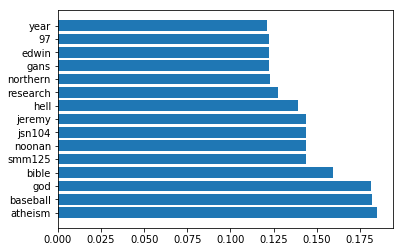

In [10]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

predictions = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))

def plot_importances(names, coefs, n=15):
    coefs, names = zip(*sorted(zip(coefs, names), reverse=True)[:n])
    plt.barh(range(len(names)), coefs, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
coefs = np.abs(model.coef_.toarray().flatten())
names = vectorizer.get_feature_names()
plot_importances(names, coefs)